In [104]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
import umap

## Simple testbed for ML algos

In [109]:
# Synthetic data generators
class DataGenerators:

    @staticmethod
    def gen_random(n=1000, d=6):
        return 10 * np.random.rand(n, d)

    @staticmethod
    def gen_gaussians(n=1000, d=6, k=4):
        # Generate from k Gaussians with random means and covariance 1
        means = [10 * np.random.rand(d) for _ in range(k)]
        samples, labels = [], []
        for _ in range(n):
            i = random.choice(range(k))
            m = means[i]
            s = np.random.multivariate_normal(mean=m, cov=np.eye(d))
            samples.append(s)
            labels.append(i)

        return np.array(samples), means, labels


## Visualize

In [125]:
# Viz code
class VizTools:
    
    @staticmethod
    def plot_2d_simple(x, labels=None, title=None):
        # No dimensionality reduction
        if labels is not None:
            plt.scatter(x[:, 0], x[:, 1], c=[sns.color_palette()[x] for x in labels])
        else:
            plt.scatter(x[:, 0], x[:, 1])
        plt.gca().set_aspect('equal', 'datalim')
        if title:
            plt.title(title)

    @staticmethod
    def plot_2d(x, labels=None, title=None):
        # Scatter plot of TSNE 2D of x, a set of vectors
        # reducer = umap.UMAP()
        # x2 = reducer.fit_transform(x)

        if x.shape[1] > 2:
            tsne = TSNE(n_components=2, learning_rate='auto',
                        init='random', perplexity=3)
            x = tsne.fit_transform(x)
        VizTools.plot_2d_simple(x, labels, title)

In [111]:
data1 = DataGenerators.gen_random(n=1000)
data2, means, labels = DataGenerators.gen_gaussians(n=1000, d=2, k=4)

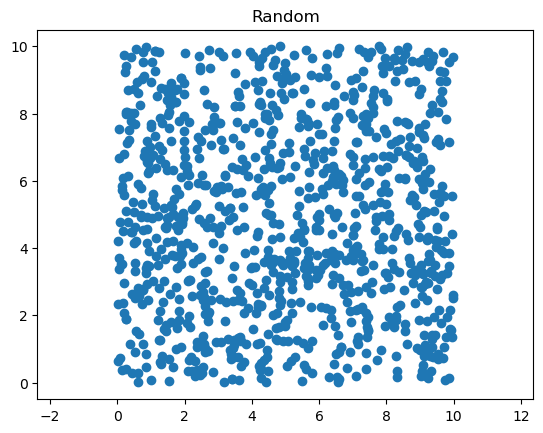

In [112]:
VizTools.plot_2d_simple(data1, title="Random")

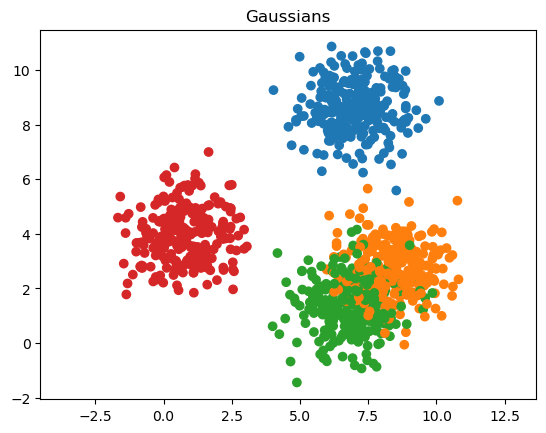

In [120]:
VizTools.plot_2d_simple(data2, title="Gaussians", labels=labels)


### More Dims

In [121]:
data3 = DataGenerators.gen_random(n=1000, d=6)
data4, means, labels2 = DataGenerators.gen_gaussians(n=1000, d=6, k=4)

In [117]:
# VizTools.plot_2d(data3)

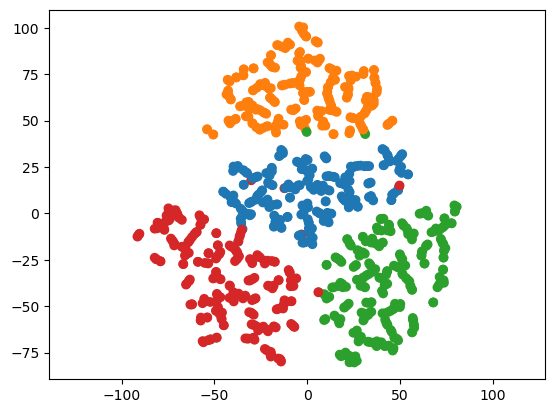

In [122]:
VizTools.plot_2d(data4, labels=labels2)